In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from YAML

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os
import shutil
from pathlib import Path

# Input dataset root (contains multiple class folders)
source_root = Path("/kaggle/input/urban-issues-dataset")

# Output YOLO dataset root
output_root = Path("/kaggle/working/dataset")
splits = ["train", "valid", "test"]

# Create YOLO folders
for split in splits:
    (output_root / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_root / "labels" / split).mkdir(parents=True, exist_ok=True)

# Loop through each class folder
for class_folder in source_root.iterdir():
    if class_folder.is_dir():
        for split in splits:
            img_dir = class_folder / class_folder.name / split / "images"
            label_dir = class_folder / class_folder.name / split / "labels"

            if not img_dir.exists() or not label_dir.exists():
                continue  # skip if split doesn't exist for this class

            for img_file in img_dir.glob("*.*"):
                src_label_path = label_dir / f"{img_file.stem}.txt"

                # If label file doesn't exist, skip
                if not src_label_path.exists():
                    continue

                # Check if label file contains invalid lines (> 5 elements)
                remove_file = False
                with open(src_label_path, "r") as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) > 5:
                            remove_file = True
                            break

                if remove_file:
                    print(f"❌ Removing invalid file pair: {img_file.name}")
                    continue  # Skip copying invalid files

                # Copy valid image
                dest_img_path = output_root / "images" / split / f"{class_folder.name}_{img_file.name}"
                shutil.copy(img_file, dest_img_path)

                # Copy valid label
                dest_label_path = output_root / "labels" / split / f"{class_folder.name}_{img_file.stem}.txt"
                shutil.copy(src_label_path, dest_label_path)

print("YOLO dataset ready at:", output_root)

❌ Removing invalid file pair: 268_png_jpg.rf.d7d8f09bb908dbf7e539e3c5e30a09b7.jpg
❌ Removing invalid file pair: 115_jpeg_jpg.rf.2bf09380cc095d35344714926a76ff0c.jpg
❌ Removing invalid file pair: 19_jpg.rf.2e084686f7cf859e9d6112c701883a3b.jpg
❌ Removing invalid file pair: istockphoto-1433866540-612x612_jpg.rf.579b08b91923064334d98422d53fddc3.jpg
❌ Removing invalid file pair: 283_jpg.rf.75a96802f0ce8eb35deadb899b76aa3f.jpg
❌ Removing invalid file pair: IMG_8405_jpg.rf.b47aa5c382a0d0000cf565ec7f10c2b7.jpg
❌ Removing invalid file pair: 263_jpg.rf.83ad874137b347e2afdb9cf16ae1a84a.jpg
❌ Removing invalid file pair: 305_png_jpg.rf.e6fe12263830b6bdcfbae2889613c73b.jpg
❌ Removing invalid file pair: 116_jpg.rf.1e7d63e0b43c6112c59a5aed6e5ac190.jpg
❌ Removing invalid file pair: IMG_8656_jpg.rf.6c1ee88d703145e810a838af5246930a.jpg
❌ Removing invalid file pair: 295_png_jpg.rf.74c090ebc793511d81de81e59c9dcdd7.jpg
❌ Removing invalid file pair: 47_jpeg_jpg.rf.1e4f440592f229253acb14f292660217.jpg
❌ Remov

In [4]:
results = model.train(data="/kaggle/input/urban-issues-dataset/config.yaml", epochs=5)  # train the model

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/urban-issues-dataset/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1135.1±727.7 MB/s, size: 76.7 KB)


train: Scanning /kaggle/working/dataset/labels/train... 25075 images, 354 backgrounds, 0 corrupt: 100%|██████████| 25075/25075 [00:20<00:00, 1197.44it/s]

train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (236).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (237).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (239).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/Garbage_Datacluster Trash (240).jpg: corrupt JPEG restored and saved
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.1d5a1334fabe41fd6f5f19a2d25ac002.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_30717230707_cc09c3e457_b_jpg.rf.65c3ceebe756b8b3ab49c0987e78d404.jpg: 2 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_392C51FF00000578-0-image-a-11_1475781587245_jpg.rf.40a8bda830db6d5dba20687d03b78dc6.jpg: 1 duplicate labels removed
train: /kaggle/working/dataset/images/train/IllegalParking_39

train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1260.6±775.5 MB/s, size: 70.4 KB)


val: Scanning /kaggle/working/dataset/labels/valid... 3279 images, 63 backgrounds, 0 corrupt: 100%|██████████| 3279/3279 [00:02<00:00, 1441.77it/s]


val: New cache created: /kaggle/working/dataset/labels/valid.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.45G      2.964      4.306      3.504         17        640: 100%|██████████| 1568/1568 [04:44<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:21<00:00,  4.74it/s]


                   all       3279       6155      0.381     0.0393      0.017    0.00537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.72G      2.063      3.265      2.416          9        640: 100%|██████████| 1568/1568 [04:35<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.19it/s]


                   all       3279       6155      0.538      0.149     0.0908     0.0411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.75G      1.907      2.909      2.224          9        640: 100%|██████████| 1568/1568 [04:34<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  5.13it/s]


                   all       3279       6155      0.355      0.191      0.126     0.0593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.77G      1.812      2.695      2.117          7        640: 100%|██████████| 1568/1568 [04:35<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.31it/s]


                   all       3279       6155      0.569      0.188       0.17     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.79G      1.752      2.544      2.052          5        640: 100%|██████████| 1568/1568 [04:35<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:19<00:00,  5.20it/s]


                   all       3279       6155       0.38      0.236      0.218      0.114

5 epochs completed in 0.414 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:20<00:00,  4.92it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3279       6155      0.383      0.235      0.218      0.114
   Damaged Road issues        727       1338       0.32     0.0419     0.0712     0.0238
        Pothole Issues        570       1818      0.239      0.232      0.163     0.0583
Illegal Parking Issues         24         38          1          0     0.0324    0.00414
Broken Road Sign Issues         41         41      0.169      0.854      0.659      0.453
          Fallen trees        982       1237       0.45      0.396      0.329      0.119
Littering/Garbage on Public Places        660       1175      0.484      0.352      0.364      0.206
      Vandalism Issues        208        393       0.36      0.232      0.219      0.117
 Dead Animal Pollution         25         25          0          0     0.0473     0.0226
Damaged Electric wires and poles         81         90      0.428     0.0111     0.0782     0.0236
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Resul


image 1/1 /kaggle/input/urban-issues-dataset/test1.jpg: 224x640 (no detections), 35.8ms
Speed: 1.4ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 640)


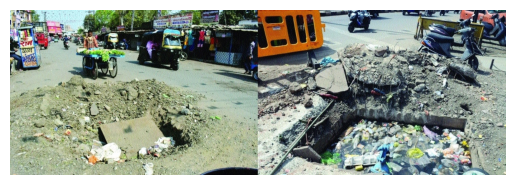

In [5]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/test1.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/test2.png: 384x640 (no detections), 37.1ms
Speed: 1.9ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


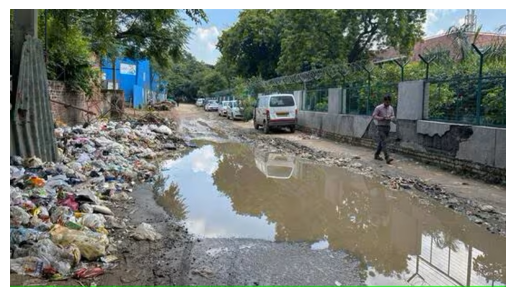

In [6]:
# Run inference
results = model('/kaggle/input/urban-issues-dataset/test2.png')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()